### Decision Tree and Random Forest

Consider The Wisconsin Breast Cancer Database. 

This dataset consists of 10 continuous attributes and 1 target class attribute. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

Take Target variable as diagnosis

### 1.2 Import the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1.3 Load the dataset

In [2]:
df= pd.DataFrame(pd.read_csv("wisc_bc_data.csv"))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.isnull().sum()  #checking for total null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 1.4 Check the data type for dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 1.5 Check the data.describe for dataset?

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.6 Check the data.groupby count for diagnosis?

In [7]:
df['diagnosis'].count()

569

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
#converting categorical  data to numerical data 
df.diagnosis= df.diagnosis.replace('M', 1)
df.diagnosis= df.diagnosis.replace('B', 0)

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.7 drop the first column from the data frame. This is Id column which is not used in modeling?

In [11]:
df.drop(['id'], axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1.8 Create a separate dataframe consisting only of the features i.e independent attributes

<AxesSubplot:>

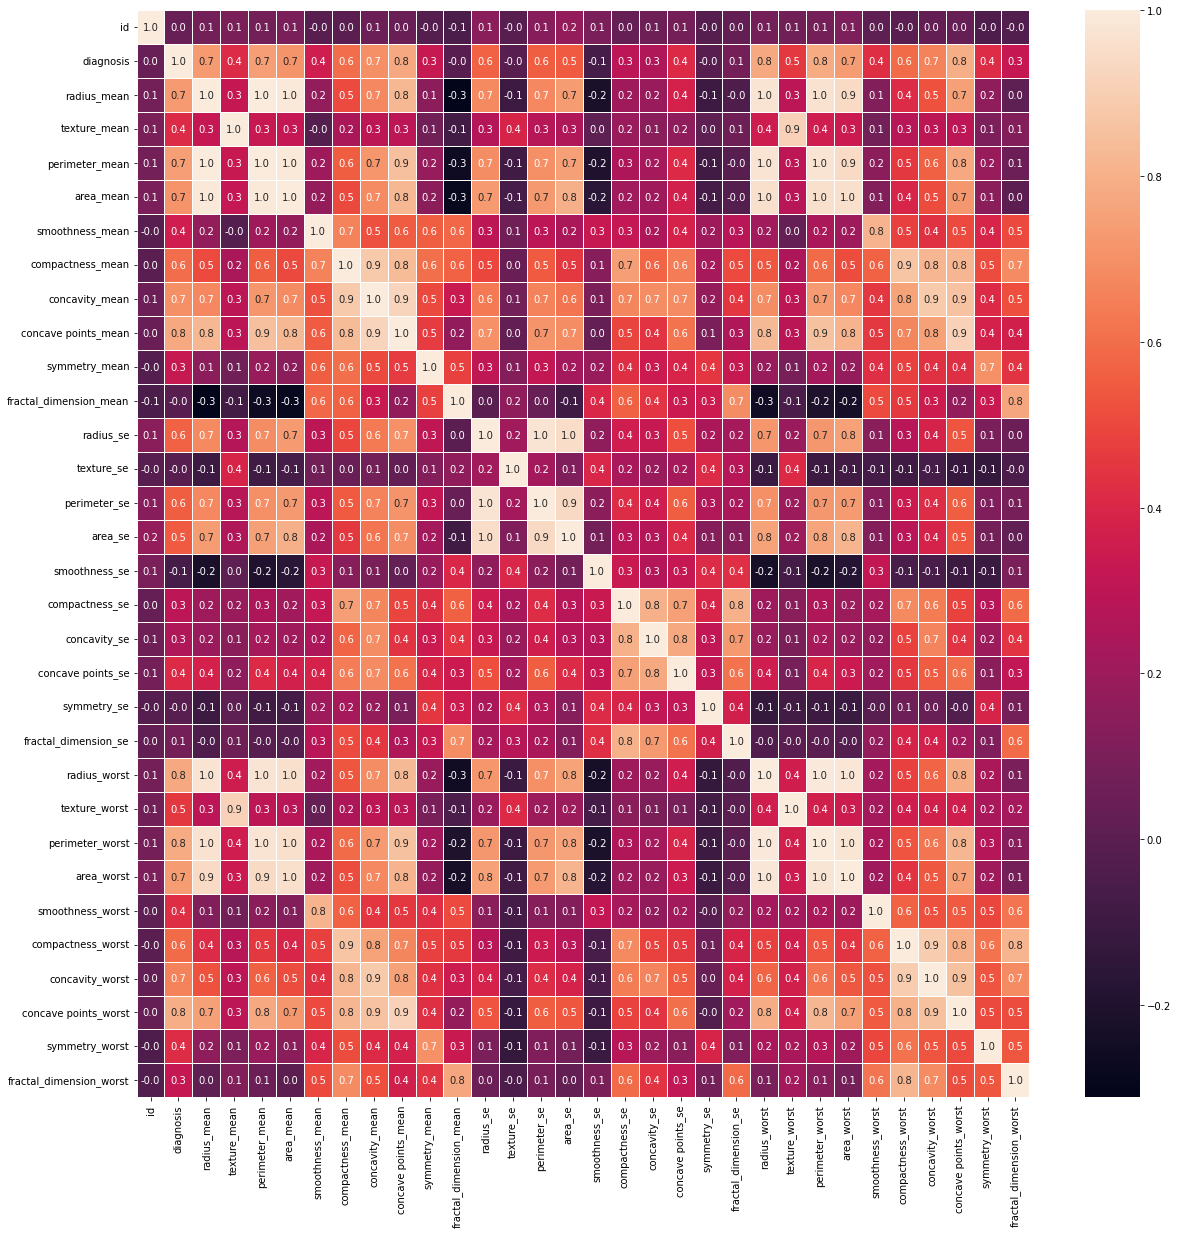

In [12]:
# plotting correlation heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f')

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [13]:
# now the final features
feature=['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','symmetry_mean',
         'fractal_dimension_mean','texture_se', 'area_se','smoothness_se', 'concavity_se', 
         'symmetry_se', 'fractal_dimension_se','texture_worst', 'area_worst', 'smoothness_worst',
         'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']
data=df[feature]
data.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,17.33,2019.0,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,23.41,1956.0,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,25.53,1709.0,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,26.50,567.7,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,16.67,1575.0,0.1374,0.4000,0.2364,0.07678


<AxesSubplot:>

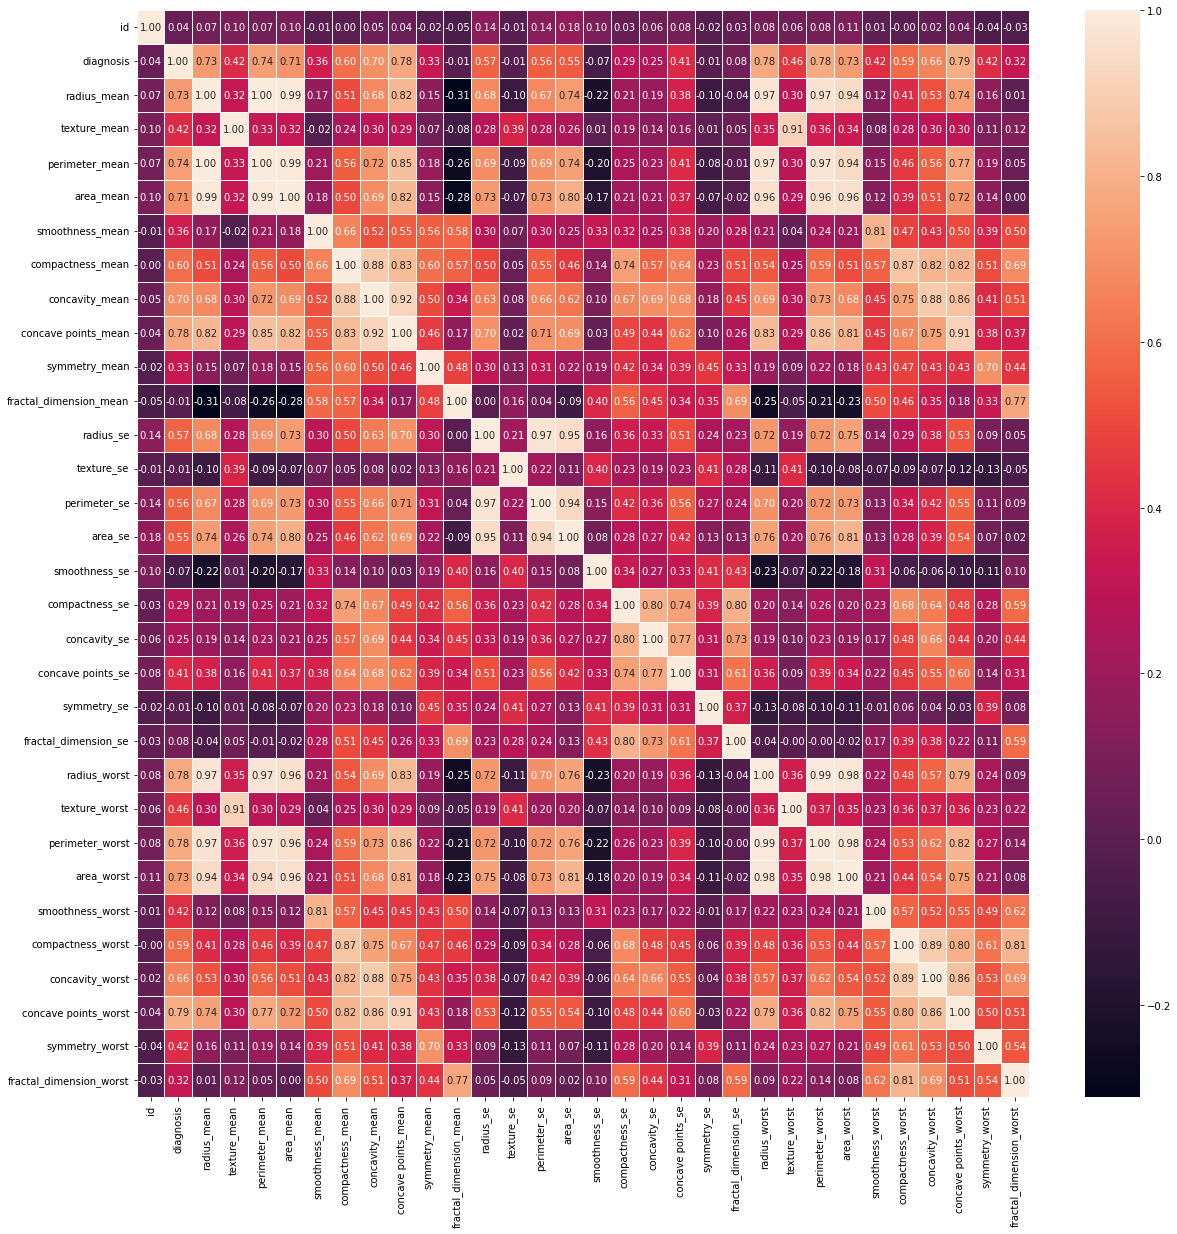

In [14]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.2f')

### 1.9 convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

It is always adviced to scale numeric attributes in models that calculate distances.

In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
from scipy.stats import zscore
data_std=data.apply(zscore)
data_std

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,-1.359293,2.001237,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,-0.023974,1.456285,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,0.133984,-0.550021,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,-1.466770,1.220724,0.220556,0.613179,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,1.947285,-0.312589,-0.931027,0.071025,2.604187,1.086384,0.666001,-1.138416,0.167980,0.117700,2.015301,0.378365,0.664512,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,0.693043,-0.217664,-1.058611,2.260938,1.291565,-0.424010,0.252202,-0.189161,-0.490556,2.047399,1.494959,-0.691230,0.236573,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,0.046588,-0.809117,-0.895587,-0.257371,0.180698,-0.379342,0.510827,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.326767,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.296944,2.137194,1.043695,0.686088,1.009503,-0.173000,1.302285,0.326634,0.904057,2.237926,1.653171,1.430427,3.197605,1.919083,2.219635


### 1.10 Capture the class values from the 'diagnosis' colum.

In [17]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### 1.11 Extract the independent variable X and dependent variable Y?

In [18]:
x=data_std[feature]

In [19]:
y=df.diagnosis

### 1.12 Split the data into train and test set:(70/30)

In [20]:
# test and traning data split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 1.13 Import all the algorithms we want to test

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=20,max_depth=3,random_state=42)
random_forest.fit(x_train,y_train)
y_pred_train=random_forest.predict(x_train)
y_pred_test=random_forest.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
accuracy_score_train=accuracy_score(y_train,y_pred_train)
accuracy_score_test=accuracy_score(y_test,y_pred_test)

print("Accuracy of Random Forest on train set: %.2f%%" % (accuracy_score_train * 100.0))
print("Accuracy of Random Forest on test set: %.2f%%" % (accuracy_score_test * 100.0))

Accuracy of Random Forest on train set: 97.24%
Accuracy of Random Forest on test set: 95.91%


In [22]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       249
           1       0.98      0.95      0.96       149

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [23]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(criterion='gini',max_depth =3,random_state=42)
# fit the model
decision_tree.fit(x_train, y_train)
y_pred_train_dt = decision_tree.predict(x_train)
y_pred_test_dt = decision_tree.predict(x_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score_train=accuracy_score(y_train,y_pred_train_dt)
accuracy_score_test=accuracy_score(y_test,y_pred_test_dt)

print("Accuracy of Decision Tree on train set: %.2f%%" % (accuracy_score_train * 100.0))
print("Accuracy of Decision Tree on test set: %.2f%%" % (accuracy_score_test * 100.0))

Accuracy of Decision Tree on train set: 96.98%
Accuracy of Decision Tree on test set: 96.49%


In [26]:
print(classification_report(y_train,y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       249
           1       0.96      0.96      0.96       149

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [27]:
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



####  1.13a) Prepare the configuration to run the (X,Y),seed=7

In [28]:
from sklearn import model_selection
X=data_std[feature]
Y=df.diagnosis
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('RFC',RandomForestClassifier(n_estimators=20,max_depth=3)))
models.append(('DTC', DecisionTreeClassifier(criterion='gini',max_depth =3)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    result = "%s: %f" % (name, cv_results.mean())
    print(result)


RFC: 0.952569
DTC: 0.940288


#### 1.13 c) Every algorithm is tested and results are collected and printed?


#### Random Forest

In [29]:
print('Accuracy of Random Forest on train: ',accuracy_score_train*100)
print('Accuracy of Random Forest on test: ',accuracy_score_test*100)

Accuracy of Random Forest on train:  96.98492462311557
Accuracy of Random Forest on test:  96.49122807017544


In [30]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



#### Decision Tree

In [31]:
# print the scores on training and test set

print("Accuracy of Decision Tree on train set: %.2f%%" % (accuracy_score_train * 100.0))
print("Accuracy of Decision Tree on test set: %.2f%%" % (accuracy_score_test * 100.0))

Accuracy of Decision Tree on train set: 96.98%
Accuracy of Decision Tree on test set: 96.49%


In [32]:
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#### 1.13 d) boxplot algorithm comparison

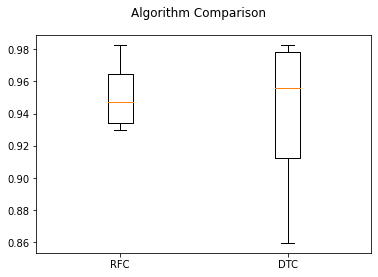

In [33]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()